<a href="https://colab.research.google.com/github/kimyuji/AI_Assignment/blob/main/1_XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1-Layer Model

In [ ]:
# Weight Setting
random.seed(3013)
W1 = np.random.randn(2,1) 
b1 = np.random.randn(1,1)

In [ ]:
# Activation Function - sigmoid
def sigmoid(x):          
    return 1 / (np.exp(-x)+1)

In [ ]:
# Training Step
errors = []
for epoch in range(epochs):

    for batch in range(4): 
        idx = random.randint(0,3) 

        # 입력 데이터 xin과 해당하는 정답 ans 불러오기
        xin = train_inp[idx].reshape(1,2) 
        ans = train_out[idx] 
        
        
        # Feedforward 1-layer
        x1 = sigmoid(np.dot(xin, W1) + b1) 

        # loss
        loss = -(ans*np.log(x1)+(1-ans)*np.log(1-x1))

        
        # Weight 초기값을 설정
        delta_W1 = np.zeros((2,3))
        delta_b1 = np.zeros((1,3))
        
        
        # Back propagation을 통한 Weight의 Gradient update step        
        delta_W1 = (x1-ans)*xin.T
        delta_b1 = x1-ans


    
        # 각 weight의 update 반영
        W1 = W1 -learning_rate * delta_W1
        b1 = b1 - learning_rate * delta_b1
        
        
        ## 500번째 epoch마다 loss를 프린트 합니다.
    if epoch%500 == 0:
        print("epoch[{}/{}] loss: {:.4f}".format(epoch,epochs,float(loss)))
        

    errors.append(loss)

epoch[0/10000] loss: 2.1634
epoch[500/10000] loss: 0.4358
epoch[1000/10000] loss: 0.5948
epoch[1500/10000] loss: 0.7281
epoch[2000/10000] loss: 0.7602
epoch[2500/10000] loss: 0.6128
epoch[3000/10000] loss: 0.8789
epoch[3500/10000] loss: 0.5613
epoch[4000/10000] loss: 0.5471
epoch[4500/10000] loss: 0.6645
epoch[5000/10000] loss: 0.8520
epoch[5500/10000] loss: 0.5560
epoch[6000/10000] loss: 1.0984
epoch[6500/10000] loss: 0.4147
epoch[7000/10000] loss: 0.6835
epoch[7500/10000] loss: 0.6530
epoch[8000/10000] loss: 0.6314
epoch[8500/10000] loss: 0.5740
epoch[9000/10000] loss: 0.7874
epoch[9500/10000] loss: 0.6039


Text(0, 0.5, 'loss')

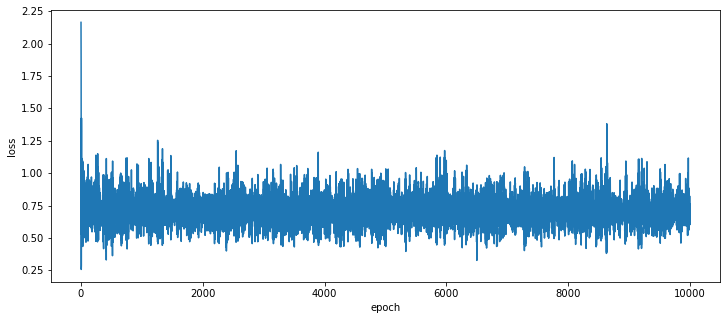

In [ ]:
# loss graph
loss =  np.array(errors)
plt.figure(figsize=(12, 5))
plt.plot(loss.reshape(epochs))
plt.xlabel("epoch")
plt.ylabel("loss")

In [ ]:
# Testing Step
for idx in range(4):
    xin = train_inp[idx]
    ans = train_out[idx]
    
    x1 = sigmoid(np.matmul(xin,W1)+b1)

    pred = x1
    
    print("input: ", xin, ", answer: ", ans, ", pred: {:.4f}".format(float(pred)))

input:  [1 1] , answer:  0 , pred: 0.4724
input:  [1 0] , answer:  1 , pred: 0.4838
input:  [0 1] , answer:  1 , pred: 0.4378
input:  [0 0] , answer:  0 , pred: 0.4491


In [ ]:
# Weight Saving
np.savetxt("학번_layer1_weight",(W1, b1),fmt="%s")

# 2-Layer Model

In [ ]:
# Weight Setting
random.seed(3011)
W1 = np.random.randn(2,3) 
W2 = np.random.randn(3,1)
b1 = np.random.randn(1,3)
b2 = np.random.randn(1,1)

In [ ]:
# Activation Function
def sigmoid(x):          
    return 1 / (np.exp(-x)+1)

In [ ]:
# Training Step
errors = []
for epoch in range(epochs): 
    for batch in range(4): 
        idx = random.randint(0,3) 

        # 입력 데이터 xin과 해당하는 정답 ans 불러오기
        xin = train_inp[idx].reshape(1,2) 
        ans = train_out[idx] 
        
        
        # Feedforward layer-1
        x1 = sigmoid(np.dot(xin, W1) + b1) 
        # Feedforward layer-2
        x2 = sigmoid(np.dot(x1, W2) + b2) 

        # loss
        loss = -(ans*np.log(x2)+(1-ans)*np.log(1-x2))

        
        # Weight 초기값을 설정
        delta_W1 = np.zeros((2,3))
        delta_W2 = np.zeros((3,1))
        delta_b1 = np.zeros((1,3))
        delta_b2 = np.zeros((1,1))
        
        
        # Back propagation을 통한 Weight의 Gradient update step        
        # Hidden-to-output: 
        delta_W2 = (x2-ans)*(x1.T)
        delta_b2 = x2-ans
        # Input-to-hidden:
        delta_W1 =  np.dot((x2-ans)*W2*((x1*(1-x1)).T), xin.reshape(1,2)).T
        delta_b1 = ((x2-ans)*W2*(x1*(1-x1)).T).T

        # 각 weight의 update 반영
        W1 = W1 -learning_rate * delta_W1
        W2 = W2 - learning_rate * delta_W2
        
        b1 = b1 - learning_rate * delta_b1
        b2 = b2 - learning_rate * delta_b2
        
        
        ## 500번째 epoch마다 loss를 프린트 합니다.
    if epoch%500 == 0:
        print("epoch[{}/{}] loss: {:.4f}".format(epoch,epochs,float(loss)))
        

    errors.append(loss)


epoch[0/10000] loss: 0.7983
epoch[500/10000] loss: 0.7870
epoch[1000/10000] loss: 0.5171
epoch[1500/10000] loss: 0.2134
epoch[2000/10000] loss: 0.0567
epoch[2500/10000] loss: 0.0401
epoch[3000/10000] loss: 0.0361
epoch[3500/10000] loss: 0.0190
epoch[4000/10000] loss: 0.0191
epoch[4500/10000] loss: 0.0159
epoch[5000/10000] loss: 0.0158
epoch[5500/10000] loss: 0.0105
epoch[6000/10000] loss: 0.0089
epoch[6500/10000] loss: 0.0108
epoch[7000/10000] loss: 0.0082
epoch[7500/10000] loss: 0.0069
epoch[8000/10000] loss: 0.0070
epoch[8500/10000] loss: 0.0070
epoch[9000/10000] loss: 0.0065
epoch[9500/10000] loss: 0.0068


Text(0, 0.5, 'loss')

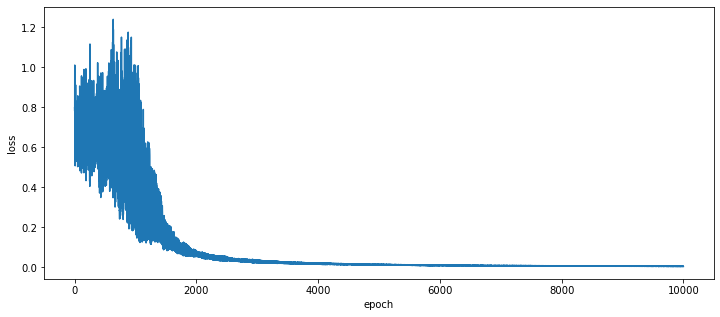

In [ ]:
# loss graph
plt.figure(figsize=(12, 5))
loss =  np.array(errors)
plt.plot(loss.reshape(epochs))
plt.xlabel("epoch")
plt.ylabel("loss")

In [ ]:
# Testing Step
for idx in range(4):
    xin = train_inp[idx]
    ans = train_out[idx]
    
    x1 = sigmoid(np.matmul(xin,W1)+b1)
    x2 = sigmoid(np.matmul(x1,W2)+b2)

    pred = x2
    
    print("input: ", xin, ", answer: ", ans, ", pred: {:.4f}".format(float(pred)))
    

input:  [1 1] , answer:  0 , pred: 0.0058
input:  [1 0] , answer:  1 , pred: 0.9948
input:  [0 1] , answer:  1 , pred: 0.9951
input:  [0 0] , answer:  0 , pred: 0.0063


In [ ]:
# Weight Saving
np.savetxt("학번_layer2_weight",(W1, W2, b1, b2),fmt="%s")